In [4]:
## Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Muestra directamente los graficos dentro del notebook
%matplotlib inline
sns.set() # Toda la trama se cubrirá al estilo Seaborn.

In [64]:
# Cargar el Dataset
car_data = pd.read_csv('Documents/ANALISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervi/Anexo 2 - Dataset Vehicle/Car data.csv')

In [66]:
# Mostrar las primeras 5 filas
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# Información general del dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# Numero de filas y columnas del Dataset
car_data.shape

(301, 9)

In [68]:
# Estadísticas descriptivas
car_data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [70]:
# Verficar valores faltantes
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

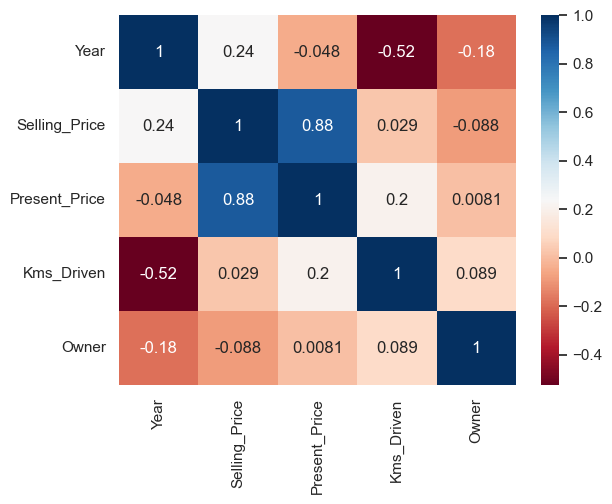

In [20]:
# Filtrar solo las columnas numéricas del dataset
numerical_features = car_data.select_dtypes(include=[np.number])
#Matriz de correlación
sns.heatmap(numerical_features.corr(), annot=True, cmap="RdBu")
plt.show()

In [74]:
# Correlación de 'Selling_Price' con otras variables numéricas
numerical_features.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

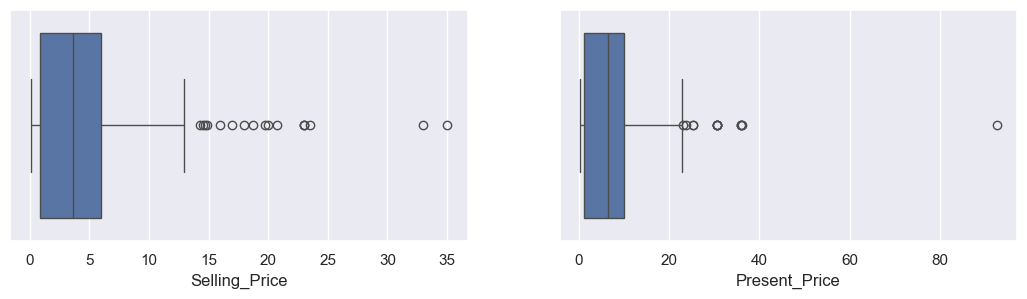

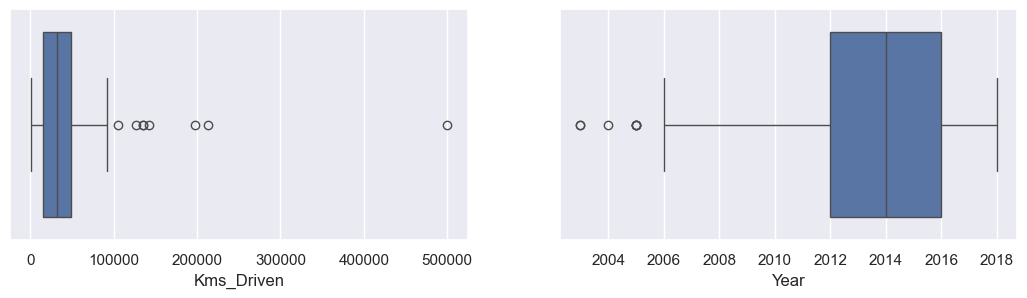

In [72]:
# Boxplots para detectar outliers en columnas numericas
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Year']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=car_data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=car_data)
    i += 1
    
    plt.show()

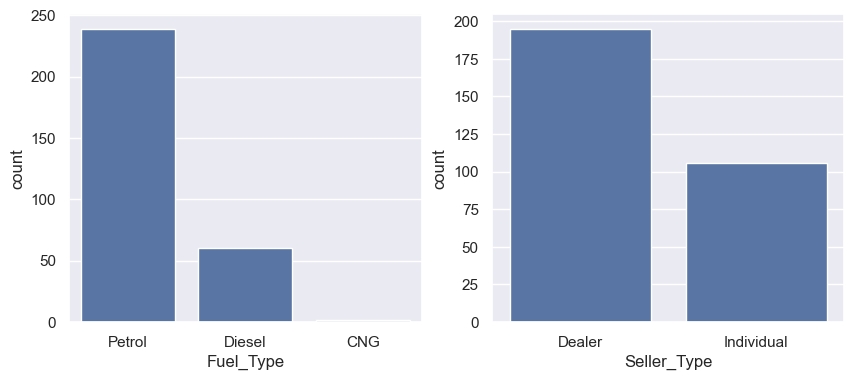

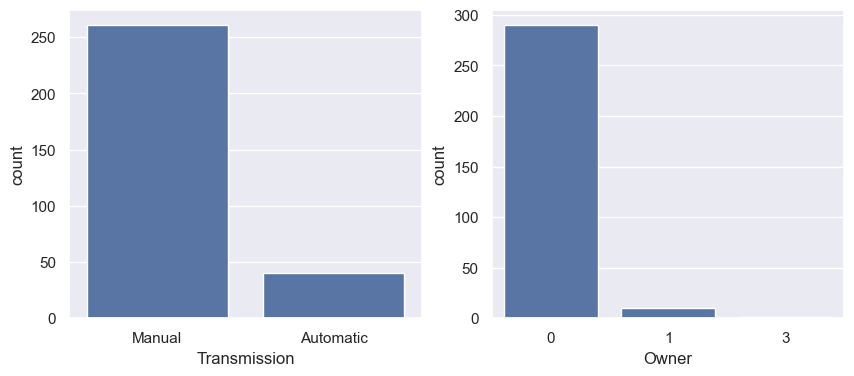

In [26]:
# Bar Char para las columna categoricas
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=car_data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=car_data)
    i += 1
    
    plt.show()

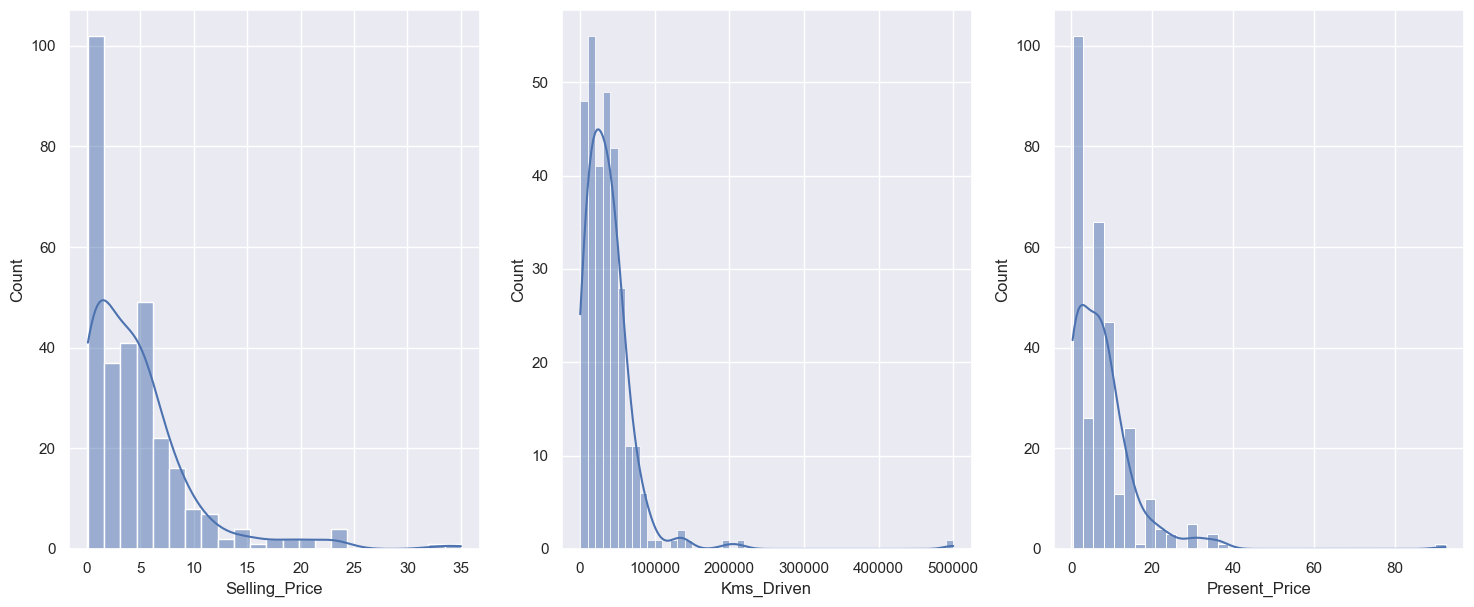

In [76]:
# Distribucion de la columnas numericas
import seaborn as sns
import matplotlib.pyplot as plt

# Distribucion de las columnas numéricas
plt.figure(figsize=(18,7))

plt.subplot(1, 3, 1)
sns.histplot(car_data['Selling_Price'], kde=True)

plt.subplot(1, 3, 2)
sns.histplot(car_data['Kms_Driven'], kde=True)

plt.subplot(1, 3, 3)
sns.histplot(car_data['Present_Price'], kde=True)

plt.show()


In [78]:
# Eliminar la columna Car_Name
car_data.drop(labels='Car_Name',axis= 1, inplace = True)

In [80]:
# Comprobar
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:

# Convertir las variables categoricas a numericas
car_data = pd.get_dummies(car_data)

# Selecciona solo las columnas booleanas (dummies) para convertirlas a enteros
bool_columns = car_data.select_dtypes(include='bool').columns

# Convierte las columnas booleanas a enteros (0 y 1)
car_data[bool_columns] = car_data[bool_columns].astype(int)

# Verifica el resultado
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [84]:

# crear X (columnas independientes) e y (columna dependiente o objetivo)
y = car_data['Selling_Price']
X = car_data.drop('Selling_Price',axis=1)

In [86]:
from sklearn.model_selection import train_test_split

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((225, 11), (225,), (76, 11), (76,))

In [94]:
# Implementación de LinearRegressionModel
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
# Realizar predicciones en el conjunto de prueba usando el modelo entrenado
prediction = lr.predict(X_test)
# Puntuación de entrenamiento
print("Training score: ", lr.score(X_train, y_train))
# Puntación de la prueba
print("test score: ", lr.score(X_test,y_test)) 

Training score:  0.882939572704355
test score:  0.8770281948904408


In [98]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(y_test, prediction))
print('MSE : ', metrics.mean_squared_error(y_test, prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared : ', metrics.r2_score(y_test, prediction))

MAE :  1.2283245143228196
MSE :  3.378564707956318
RMSE :  1.8380872416608298
R squared :  0.8770281948904408


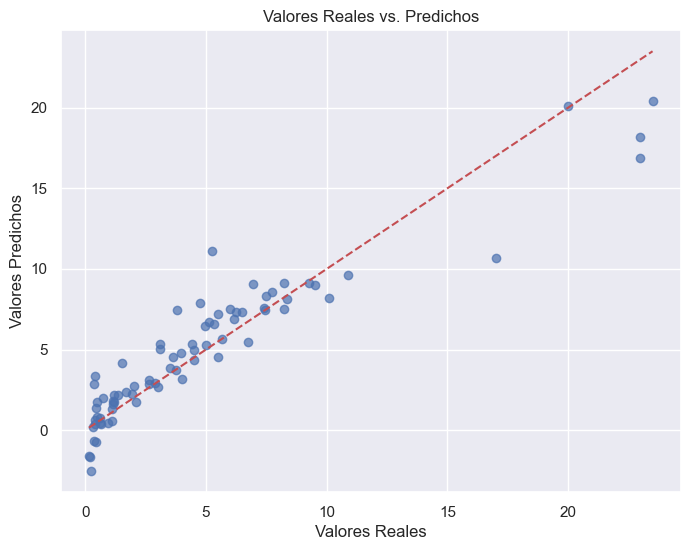

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

<h1>Interpretación, análisis y documentación de los resultados obtenidos<h1>


Del desempeño del modelo podemos entender lo siguiente:

Coeficiente de determinación (R²): El R² representa la fracción de variabilidad en la variable objetivo (precio de venta) que el modelo logra explicar. Un valor de 0.8770 indica que el 87.7% de la variabilidad en los precios de venta de los vehículos se debe a las variables independientes (como el año, precio actual, tipo de combustible, tipo de vendedor, kilometraje recorrido, entre otras) incluidas en el modelo.

Error Absoluto Medio (MAE): Este indicador muestra el error promedio entre los valores predichos y los reales. En este caso, el modelo presenta un error promedio de aproximadamente 1.23 unidades, lo que implica que, en promedio, las predicciones se desvían 1.23 unidades del valor real.

Error Cuadrático Medio (MSE): El MSE calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Debido a que eleva los errores al cuadrado, da más peso a los errores más grandes en comparación con el MAE. En este caso, el MSE es de 3.38, lo cual sugiere la presencia de algunos errores de mayor magnitud en las predicciones.

Interpretación del gráfico de dispersión:

El gráfico muestra que el modelo realiza una predicción razonablemente precisa, ya que muchos puntos se encuentran cerca de la línea de referencia. Sin embargo, los puntos más alejados pueden influir en métricas como el RMSE o el MSE, ya que estas son sensibles a valores atípicos.

Conclusión:

El modelo presenta un rendimiento general satisfactorio. El coeficiente R² alto (0.8770) indica un buen ajuste a los datos reales. Tanto el MAE como el RMSE se encuentran en un rango similar (1.2 - 1.8), lo que sugiere que el error en las predicciones es relativamente estable, sin errores extremadamente elevados